# ISAT 252 Covid-19 Overview

In [4]:
import pandas

In [5]:
%matplotlib inline

In [6]:
df = pandas.read_excel('s3://buckethead252/COVID-19-geographic-disbtribution-worldwide.xlsx')

df[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-06-10,10,6,2020,542,15,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-06-09,9,6,2020,575,12,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-06-08,8,6,2020,791,30,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-06-07,7,6,2020,582,18,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-06-06,6,6,2020,915,9,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-06-05,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-06-04,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-06-03,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-06-02,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-06-01,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia


# Background

Talk about data source

# 1. Global Covid-19 Situation by Month

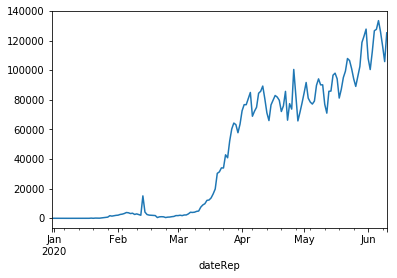

In [25]:
sum_cases_by_date = df.groupby("dateRep").sum()["cases"]

sum_cases_by_date.plot()

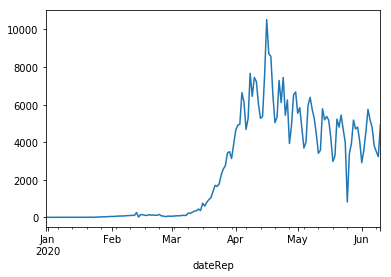

In [26]:
sum_deaths_by_date = df.groupby("dateRep").sum()["deaths"]

sum_deaths_by_date.plot()

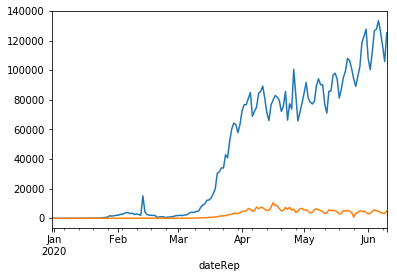

In [27]:
sum_cases_by_date = df.groupby("dateRep").sum()["cases"]

sum_cases_by_date.plot()

sum_deaths_by_date = df.groupby("dateRep").sum()["deaths"]

sum_deaths_by_date.plot()

# 2. Countries with the highest death ratio to Covid-19

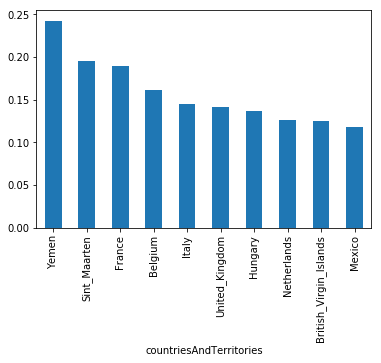

In [50]:
death_rates = (df.groupby("countriesAndTerritories").sum() ["deaths"]/ df.groupby("countriesAndTerritories").sum() ['cases'])

death_rates.nlargest(10).plot.bar()

In [71]:
death_rates.nlargest(10)

countriesAndTerritories
Yemen                     0.242366
Sint_Maarten              0.194805
France                    0.189507
Belgium                   0.161835
Italy                     0.144519
United_Kingdom            0.141395
Hungary                   0.136918
Netherlands               0.125900
British_Virgin_Islands    0.125000
Mexico                    0.117851
dtype: float64

# 3. countries with the greatest cases per capita

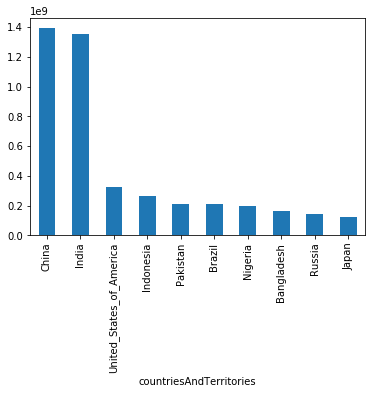

In [81]:
population = df.groupby("countriesAndTerritories").mean()["popData2018"]

population.nlargest(10).plot.bar()

In [91]:


infection_cases = (df.groupby("countriesAndTerritories").sum() ["cases"] / df.groupby("countriesAndTerritories").mean()["popData2018"])


infection_cases.nlargest(12)


countriesAndTerritories
Cases_on_an_international_conveyance_Japan    0.232000
Qatar                                         0.025840
San_Marino                                    0.020364
Holy_See                                      0.012000
Andorra                                       0.011064
Bahrain                                       0.010322
Kuwait                                        0.008010
Chile                                         0.007622
Singapore                                     0.006830
Luxembourg                                    0.006658
Peru                                          0.006369
United_States_of_America                      0.006051
dtype: float64

# Sources

# conclusion

limitations

Download today's data on the geographic distribution of COVID-19 cases worldwide. (2020, June 07). Retrieved June 10, 2020, from https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [75]:
population

countriesAndTerritories
Afghanistan                           37172386.0
Albania                                2866376.0
Algeria                               42228429.0
Andorra                                  77006.0
Angola                                30809762.0
Anguilla                                     NaN
Antigua_and_Barbuda                      96286.0
Argentina                             44494502.0
Armenia                                2951776.0
Aruba                                   105845.0
Australia                             24992369.0
Austria                                8847037.0
Azerbaijan                             9942334.0
Bahamas                                 385640.0
Bahrain                                1569439.0
Bangladesh                           161356039.0
Barbados                                286641.0
Belarus                                9485386.0
Belgium                               11422068.0
Belize                                  38307